In [ ]:
# Install library yang dibutuhkan
!pip install pandas scikit-learn gdown


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/ML2023/Regresi.csv')

Mounted at /content/drive


In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [17]:
#Pilih fitur (variabel independen) dan target (variabel dependen)
fitur = df[['R&D Spend','Administration','Marketing Spend','State']]  # Sesuaikan nama kolom
target = df['Profit']  # Sesuaikan nama kolom
# Lakukan one-hot encoding pada variabel kategorikal 'State'
fitur = pd.get_dummies(fitur, columns=['State'], drop_first=True)


In [18]:
# Bagi dataset menjadi set pelatihan dan pengujian
X_pelatihan, X_pengujian, y_pelatihan, y_pengujian = train_test_split(fitur, target, test_size=0.2, random_state=42)

In [19]:
# Buat model regresi linear
model = LinearRegression()

In [20]:
#Latih model
model.fit(X_pelatihan, y_pelatihan)

LinearRegression()

In [21]:
# Lakukan prediksi pada set pengujian
y_prediksi = model.predict(X_pengujian)

In [22]:
# Evaluasi model
mse = mean_squared_error(y_pengujian, y_prediksi)
print(f'Error Kuadrat Rata-rata: {mse}')

Error Kuadrat Rata-rata: 82010363.04430099


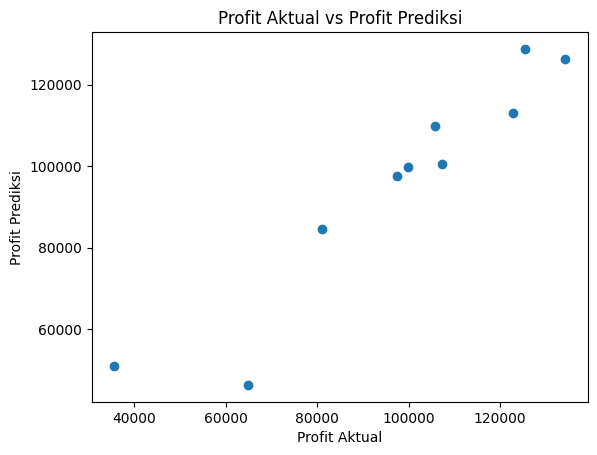

In [23]:
# Plot nilai aktual vs nilai prediksi
plt.scatter(y_pengujian, y_prediksi)
plt.xlabel('Profit Aktual')
plt.ylabel('Profit Prediksi')
plt.title('Profit Aktual vs Profit Prediksi')
plt.show()